In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [2]:
df = pd.read_excel('data/data.xlsx')

In [3]:
df.head()

,Дата/время,"Мощность активная потребленная, кВт",Статус,Статус.1,Статус.2,Статус.3,Статус.4,Статус.5,Статус.6,"Мощность реактивная потреблённая, квар",...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Активная,Unnamed: 26,Реактивная,Unnamed: 28
0,2022-01-01 00:30:00.000,2.183023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.048994,...,NaN,NaN,0.1261,0.0991,NaN,Январь,4579.062700,264.5047,4362.671500,211.0015
1,2022-01-01 01:00:00.000,2.283432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.115157,...,NaN,NaN,0.1319,0.1023,NaN,NaN,17.311839,NaN,20.676021,NaN
2,2022-01-01 01:29:59.990,2.430582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.170982,...,NaN,NaN,0.1404,0.1050,NaN,Февраль,4446.753200,264.5729,4121.615000,210.9950
3,2022-01-01 01:59:59.985,2.331905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.108954,...,NaN,NaN,0.1347,0.1020,NaN,NaN,16.807289,NaN,19.534183,NaN
4,2022-01-01 02:29:59.980,2.640055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.357066,...,NaN,NaN,0.1525,0.1140,NaN,Март,4203.884300,264.6513,3986.646400,210.9834


In [4]:
df.drop(columns=df.columns[2:], inplace=True)

In [5]:
df.head()

,Дата/время,"Мощность активная потребленная, кВт"
0,2022-01-01 00:30:00.000,2.183023
1,2022-01-01 01:00:00.000,2.283432
2,2022-01-01 01:29:59.990,2.430582
3,2022-01-01 01:59:59.985,2.331905
4,2022-01-01 02:29:59.980,2.640055


In [6]:
def join_halfs_hour(df):
    new_df = []
    for row_1,row_2 in zip(df.iloc[::2].iterrows(), df.iloc[1::2].iterrows()):
        power = row_1[1][1] + row_2[1][1]
        date = row_2[1][0]
        new_df.append([date, power])

    return pd.DataFrame(columns=df.columns, data=new_df)

In [7]:
def split_date(df):
    for col, spliter in zip(['Год', 'Месяц',  'День', 'Час', 'Минута'], ['y', 'm', 'd', 'H', 'M']):
        df[col] = pd.to_datetime(df["Дата/время"]).dt.strftime(f"%{spliter}").apply(int)
    

In [8]:
def round_minutes(df):
    new_df = deepcopy(df)
    new_df['Час'].iloc[df[df['Минута'] != 0].index] += 1
    return new_df

In [9]:
new_df = join_halfs_hour(df)

In [10]:
new_df

,Дата/время,"Мощность активная потребленная, кВт"
0,2022-01-01 01:00:00.000,4.466454
1,2022-01-01 01:59:59.985,4.762487
2,2022-01-01 02:59:59.975,5.195283
3,2022-01-01 03:59:59.965,6.012402
4,2022-01-01 04:59:59.955,9.504199
...,...,...
8011,2022-11-30 20:00:00.000,5.984460
8012,2022-11-30 21:00:00.000,6.120166
8013,2022-11-30 22:00:00.000,6.238670
8014,2022-11-30 23:00:00.000,6.152659


In [11]:
split_date(new_df)

In [12]:
new_df.drop(columns="Дата/время", inplace=True)

In [13]:
new_df = round_minutes(new_df)
new_df.drop(columns=['Минута'], inplace=True)

/tmp/ipykernel_17783/48621306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Час'].iloc[df[df['Минута'] != 0].index] += 1


In [14]:
print(new_df)

      Мощность активная потребленная, кВт  Год  Месяц  День  Час
0                                4.466454   22      1     1    1
1                                4.762487   22      1     1    2
2                                5.195283   22      1     1    3
3                                6.012402   22      1     1    4
4                                9.504199   22      1     1    5
...                                   ...  ...    ...   ...  ...
8011                             5.984460   22     11    30   20
8012                             6.120166   22     11    30   21
8013                             6.238670   22     11    30   22
8014                             6.152659   22     11    30   23
8015                             6.187064   22     11    30   12

[8016 rows x 5 columns]


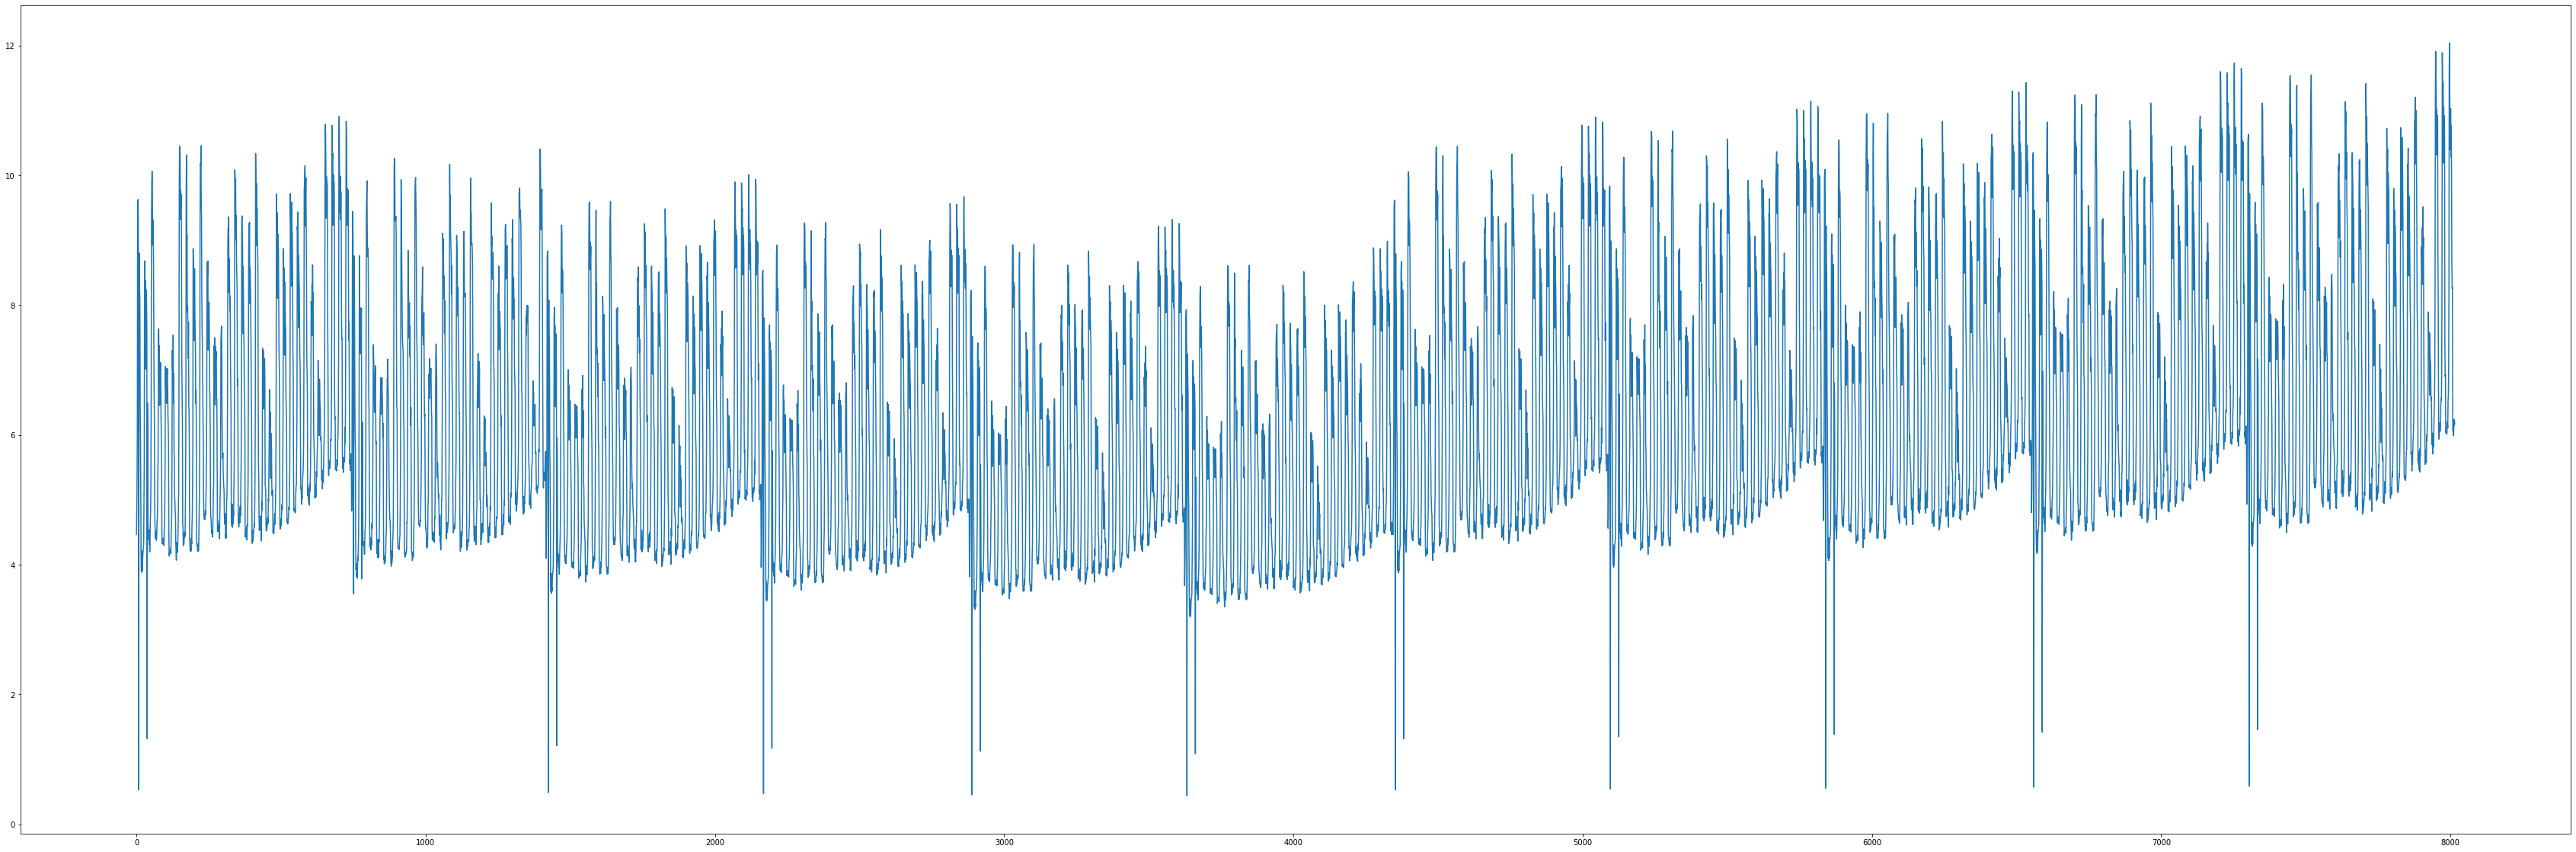

In [15]:
plt.figure(figsize=(60,20))
plt.plot(np.arange(new_df.iloc[:, 0].shape[0]), new_df.iloc[:, 0])

47


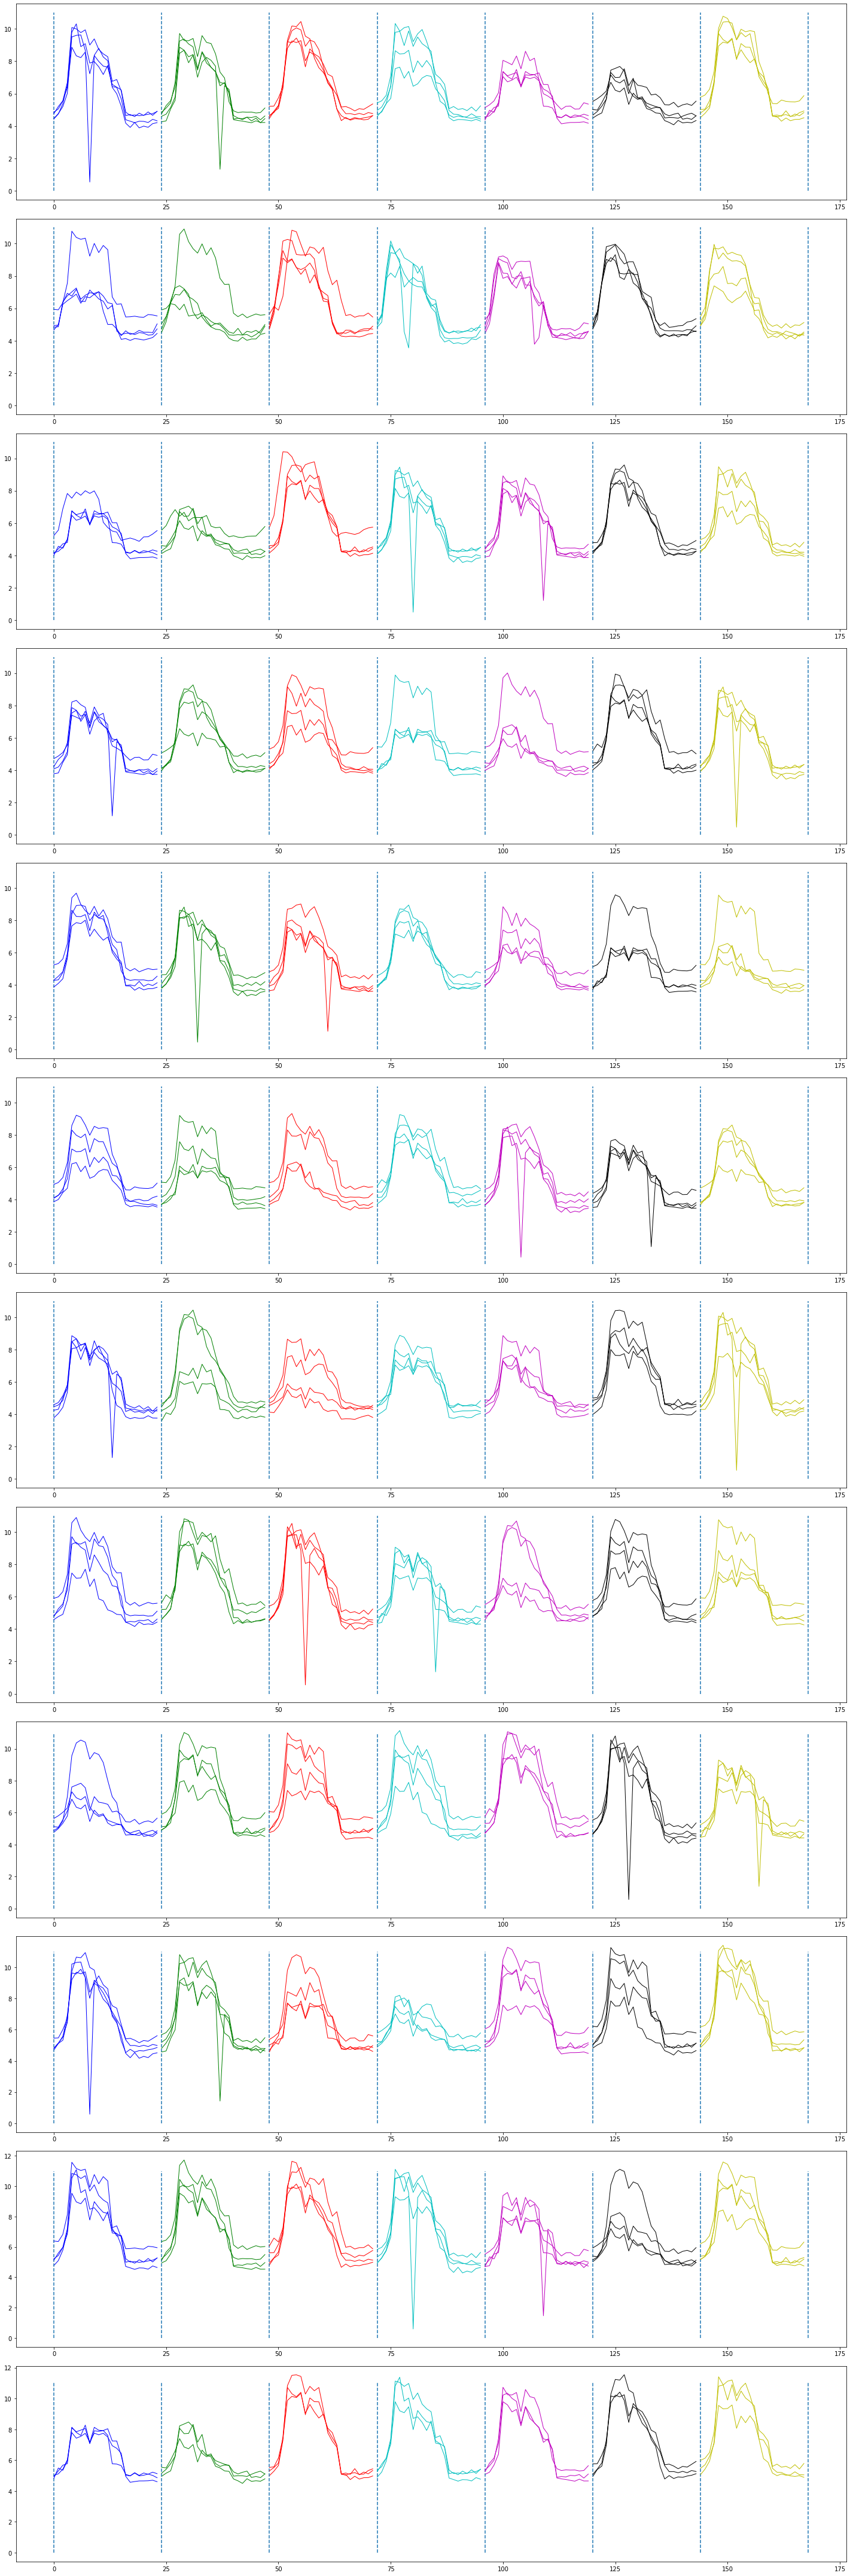

In [16]:
weaks_to_plot = int(np.floor(new_df.shape[0]/24/7))
print(weaks_to_plot)
fig, ax = plt.subplots(12, 1, figsize=(20, 60))
fig.tight_layout()
means = [0]*7
colors = 'bgrcmky'
for weak in range(weaks_to_plot):
    to_plot = ax[weak//4]
    for i in range(7):
        in_our = 24*(i) + weak*24*7
        out_hour = 24*(i+1) + weak*24*7
        a = new_df.iloc[in_our:out_hour, 0]
        weak_day = i
        means[weak_day] += a/4
        
        to_plot.plot(np.arange(24*i,24*(i+1)), a, c=colors[i%7], linewidth=1)
    

    if weak % 4 == 0:
        means = [0]*7
        to_plot.vlines([i*24 for i in range(0, 8)], [0], [11], linestyles='dashed')
        if weak != 0:
            pass



In [17]:
weaks_to_plot // 4

11

In [18]:
threat = 1.6

In [19]:
mean = new_df.iloc[:, 0].mean()

In [20]:
new_df.iloc[:, 0].describe()

count    8016.000000
mean        6.202166
std         1.892198
min         0.439156
25%         4.686070
50%         5.684574
75%         7.536753
max        12.041551
Name: Мощность активная потребленная, кВт, dtype: float64

In [21]:
blowouts = new_df[new_df.iloc[:, 0] < threat].index

In [22]:
def clean_blowouts(df, indexes):
    for index in indexes:
        power = np.mean([df.iloc[index-1, 0], df.iloc[index + 1, 0]])
        df.iloc[index, 0] = power

In [23]:
# clean_blowouts(new_df, blowouts)

In [24]:
new_df

,"Мощность активная потребленная, кВт",Год,Месяц,День,Час
0,4.466454,22,1,1,1
1,4.762487,22,1,1,2
2,5.195283,22,1,1,3
3,6.012402,22,1,1,4
4,9.504199,22,1,1,5
...,...,...,...,...,...
8011,5.984460,22,11,30,20
8012,6.120166,22,11,30,21
8013,6.238670,22,11,30,22
8014,6.152659,22,11,30,23


In [25]:
def save_data(df, name):
    df.to_csv(f'data/{name}.csv')

In [26]:
save_data(new_df, 'processed')

# FEATURE ENGINEERING

Добавим колонку для дня недели 

In [27]:
# Определим какой день недели в первой колонке 
first_week_day = '6' # суббота
count_days = new_df.shape[0] // 24



In [28]:
def get_n_week_days(start_day, n_days):
    pattern =  start_day + ''.join('1234567'.split(start_day)[::-1])
    return pattern * (n_days // 7) + pattern[:n_days%7]

In [29]:
week_days = list(map(int, ''.join(map(lambda a: a*24, get_n_week_days(first_week_day, count_days)))))

In [30]:
new_df.shape[0] / 24

334.0

In [31]:
len(week_days) == new_df.shape[0]

True

In [32]:
new_df['День недели'] = week_days

In [33]:
new_df.head()

,"Мощность активная потребленная, кВт",Год,Месяц,День,Час,День недели
0,4.466454,22,1,1,1,6
1,4.762487,22,1,1,2,6
2,5.195283,22,1,1,3,6
3,6.012402,22,1,1,4,6
4,9.504199,22,1,1,5,6


Посмотрим я вляется определенный день праздником или выходным

In [34]:
import requests as r
import datetime


def is_the_day_weekend(year, month, day):
    url = f"https://isdayoff.ru/{datetime.datetime(year, month, day).strftime('%Y%m%d')}"
    return r.get(url).json()


In [35]:
new_df['Год'] = ("20" + new_df['Год'].apply(str)).apply(int)


In [36]:
is_weekwed = [is_the_day_weekend(*tuple(a[1].values)) for a in new_df[['Год', "Месяц", "День"]].iterrows()]


In [37]:
new_df['Праздник ли это'] = is_weekwed

In [59]:
new_df

,"Мощность активная потребленная, кВт",Год,Месяц,День,Час,День недели,Праздник ли это
0,4.466454,2022,1,1,1,6,1
1,4.762487,2022,1,1,2,6,1
2,5.195283,2022,1,1,3,6,1
3,6.012402,2022,1,1,4,6,1
4,9.504199,2022,1,1,5,6,1
...,...,...,...,...,...,...,...
8011,5.984460,2022,11,30,20,3,0
8012,6.120166,2022,11,30,21,3,0
8013,6.238670,2022,11,30,22,3,0
8014,6.152659,2022,11,30,23,3,0


df.head

In [62]:
new_df.to_csv('data/processed.csv')

Добавим метеорологические данные за определенный час

In [51]:
# Координаты Новосибирска 
lat = 55.0415
lon = 82.9346
apikey = 'e14819bac5849bc541c55b8697d6cd58'
start = 1640998800
end = 1669809600
url = f'https://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={start}&end={end}&appid={apikey}'


In [52]:

req = r.get(url)

In [53]:
req.json()

{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [54]:
url

'https://history.openweathermap.org/data/2.5/history/city?lat=55.0415&lon=82.9346&type=hour&start=1640998800&end=1669809600&appid=e14819bac5849bc541c55b8697d6cd58'